k in k means is a free parameter wherein before yoou start the algorithm you have to tell the algorithm what  is the value of k that you are looking for 
Q:How to determine correct number of cluster(K)?
There is a technique called elbow method,your job is to  find the best k-number.the technique is called elbow method you start with some k so lets say you strat with k=2 we try to empute sum of square error what it means is each of the cluster you try to impute the distance of each of the individual datapoints from the centroid you square it and then you sum it up
After impuating you sum up all the square error sse=sse1+sse2+...+ssek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df=pd.read_csv("income.csv")

In [3]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


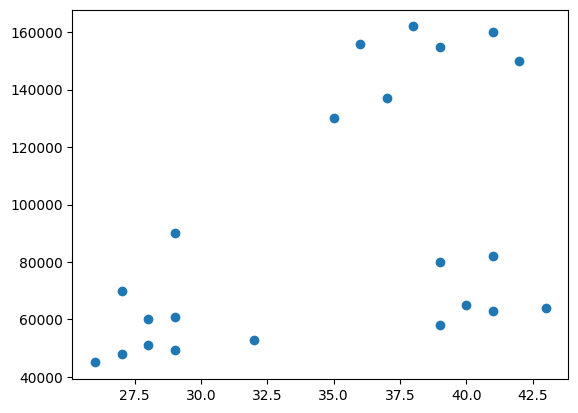

In [4]:
plt.scatter(df['Age'],df['Income($)'])

Find the best possible cluster k=...

In [5]:
from sklearn.cluster import KMeans

In [6]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In supervised learning first you can fit the model and then predict but in unsupervised you can fil_predict both samely 

In [7]:
x=df['Age']

In [8]:
y=df['Income($)']

In [13]:
y_predict=km.fit_predict(df[['Age','Income($)']])

In [14]:
y_predict

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

for more visualization 

In [15]:
df['cluster']=y_predict

In [16]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


Seprate the dataframe according to the given cluster

C:\Users\R.C\AppData\Local\Temp\ipykernel_11700\2077159165.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


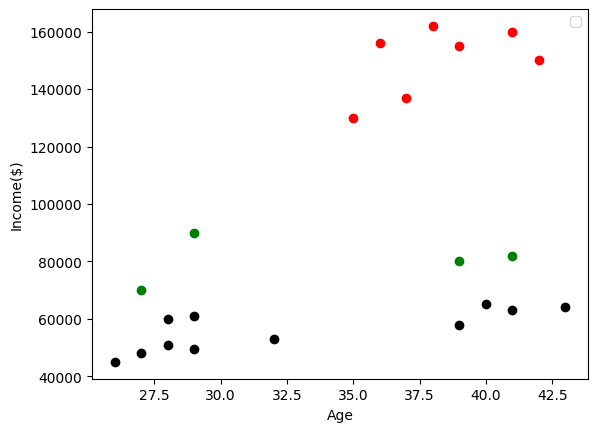

In [18]:
df0=df[df['cluster']==0]
df1=df[df['cluster']==1]
df2=df[df['cluster']==2]

plt.scatter(df0['Age'],df0['Income($)'],color='green')
plt.scatter(df1['Age'],df1['Income($)'],color='red')
plt.scatter(df2['Age'],df2['Income($)'],color='black')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

we use minmax scaler for more preprocessing

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler=MinMaxScaler()

In [21]:
scaler.fit(df[['Income($)']])


MinMaxScaler()

In [23]:
df['Income($)']=scaler.transform(df[['Income($)']])

In [24]:
df

,Name,Age,Income($),cluster
0,Rob,27,0.213675,0
1,Michael,29,0.384615,0
2,Mohan,29,0.136752,2
3,Ismail,28,0.128205,2
4,Kory,42,0.897436,1
5,Gautam,39,0.940171,1
6,David,41,0.982906,1
7,Andrea,38,1.000000,1
8,Brad,36,0.948718,1
9,Angelina,35,0.726496,1


In [26]:
scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])


In [27]:
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


K-Means clustring on an scaled data

In [28]:
km=KMeans(n_clusters=3)
y_predict=km.fit_predict(df[['Age','Income($)']])
y_predict

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [29]:
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [36]:
df.drop('cluster',axis=1,inplace=True)

In [37]:
df

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [39]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

C:\Users\R.C\AppData\Local\Temp\ipykernel_11700\2310081850.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


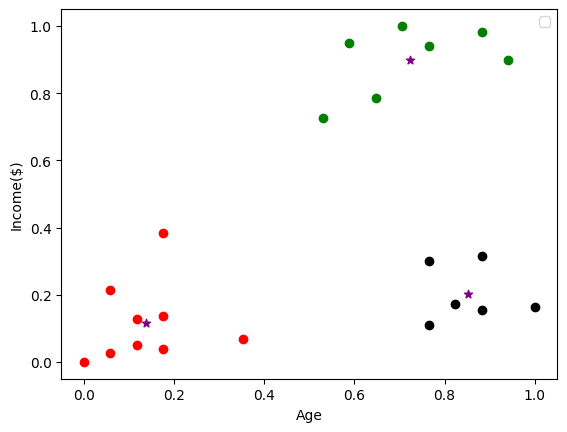

In [40]:
df0=df[df['Cluster']==0]
df1=df[df['Cluster']==1]
df2=df[df['Cluster']==2]

plt.scatter(df0['Age'],df0['Income($)'],color='green')
plt.scatter(df1['Age'],df1['Income($)'],color='red')
plt.scatter(df2['Age'],df2['Income($)'],color='black')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

Elbow method 

In [41]:
k_rng=range(1,10)
sse=[]
for k in range(1,10):
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [42]:
sse

[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.40266726804338093,
 0.2766936276300279,
 0.2203764169077067,
 0.19161375182912765,
 0.14417954691813867,
 0.1241983382628253]

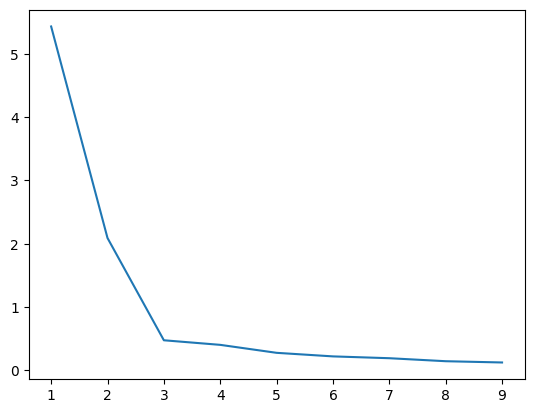

In [43]:
plt.plot(k_rng,sse)